In [1]:
import lightkurve as lk
import gc
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

##  TOI 519 b

In [2]:
#https://arxiv.org/pdf/2011.11458.pdf
tpf_TOI519 = lk.search_targetpixelfile("TOI-519").download()

/Users/masamasakobakoba/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


In [3]:
tpf_TOI519.header

/Users/masamasakobakoba/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The header function is deprecated and may be removed in a future version.
        Use get_header() instead.
  """Entry point for launching an IPython kernel.


SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    3 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2019-02-23'         / file creation date.                            
TSTART  =    1491.625533688852 / observation start time in TJD                  
TSTOP   =    1516.086634607482 / observation stop time in TJD                   
DATE-OBS= '2019-01-08T02:59:

In [3]:
tpf_TOI519.interact(aperture_mask="pipeline")

In [7]:
# Then we convert the target pixel file into a light curve using the pipeline-defined aperture mask.
lc_TOI519 = tpf_TOI519.to_lightcurve(aperture_mask=tpf_TOI519.pipeline_mask)

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

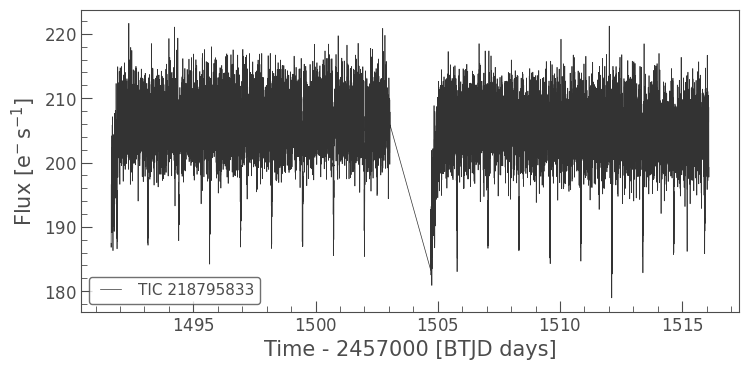

In [9]:
lc_TOI519.plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

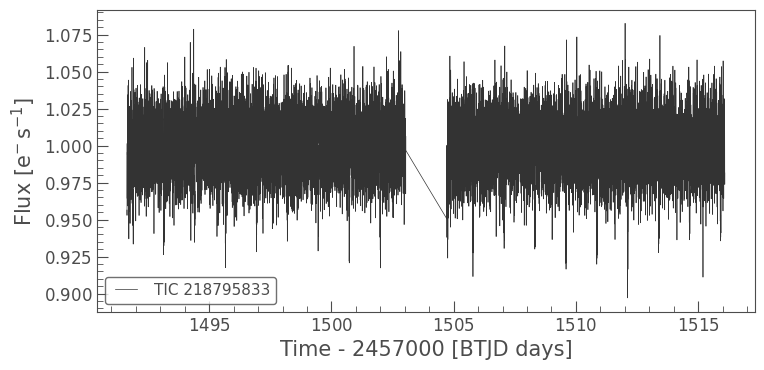

In [28]:
flat_TOI519 = lc_TOI519.flatten(window_length=101)
flat_TOI519.plot()

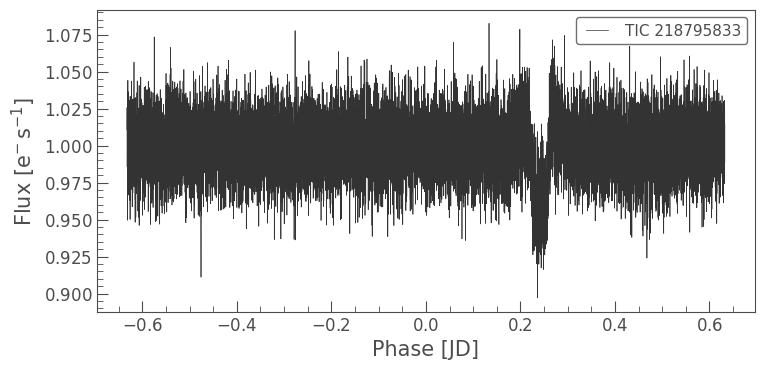

In [36]:
folded_TOI519 = flat_TOI519.fold(period=1.2652)
folded_TOI519.plot();

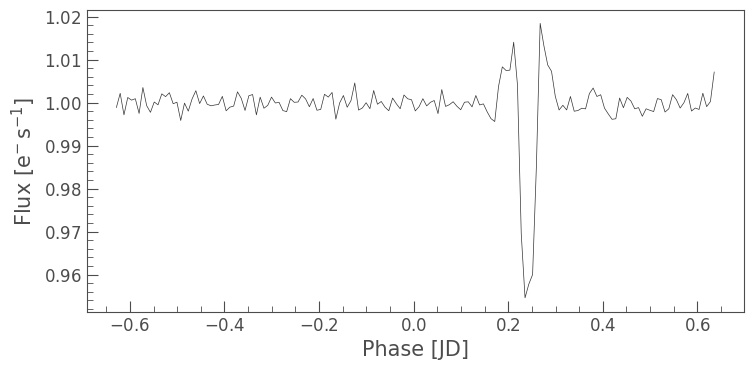

In [46]:
binned_TOI519 = folded_TOI519.bin(time_bin_size=0.008)
binned_TOI519.plot();

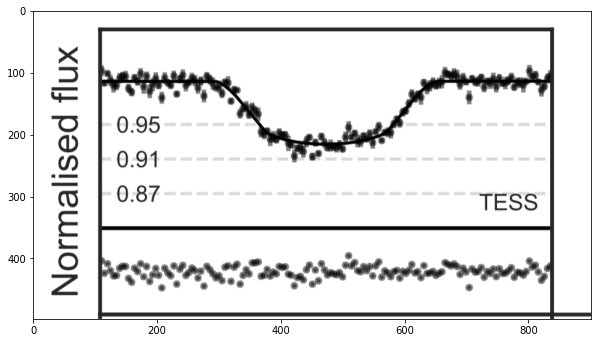

In [54]:
img = Image.open("TOI519.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.show()

## 55 Cancri e

In [3]:
tpf_55Cancri = lk.search_targetpixelfile("55Cancri", cadence="long").download()

In [5]:
tpf_55Cancri.interact(aperture_mask="pipeline")

In [6]:
lc_55Cancri = tpf_55Cancri.to_lightcurve(aperture_mask=tpf_55Cancri.pipeline_mask).remove_outliers()

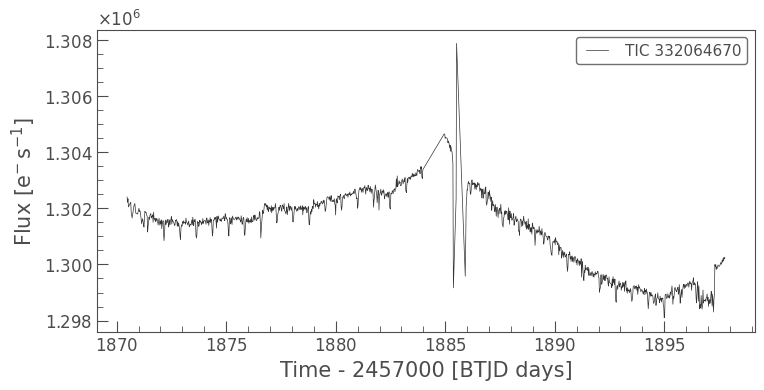

In [7]:
lc_55Cancri.plot();

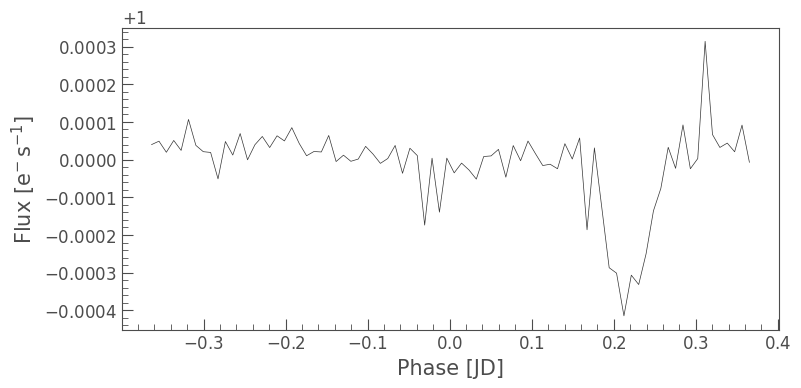

In [15]:
lc_55Cancri.remove_nans().flatten(window_length=101).fold(period=0.7365449).bin(time_bin_size=0.009).plot();

In [79]:
tpf_55Cancri?